In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agribora-commodity-price-forecasting-challenge/agriBORA_maize_prices_weeks_46_to_49.csv
/kaggle/input/agribora-commodity-price-forecasting-challenge/kamis_maize_prices.csv
/kaggle/input/agribora-commodity-price-forecasting-challenge/SampleSubmission.csv
/kaggle/input/agribora-commodity-price-forecasting-challenge/agriBORA_maize_prices.csv
/kaggle/input/agribora-commodity-price-forecasting-challenge/kamis_maize_prices_raw.csv


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

print("=" * 80)
print("EXPLORING ALL DATASETS FOR AGRIBORA MAIZE PRICE FORECASTING")
print("=" * 80)

# Load all datasets
print("\n📁 LOADING ALL DATASETS...")
print("-" * 50)

# 1. agriBORA main dataset
print("\n1. 🌾 agriBORA_maize_prices.csv (MAIN DATA TO PREDICT)")
agribora = pd.read_csv('/kaggle/input/agribora-commodity-price-forecasting-challenge/agriBORA_maize_prices.csv')
print(f"   Shape: {agribora.shape}")
print(f"   Columns: {list(agribora.columns)}")
print(f"   First 5 rows:")
display(agribora.head())
print(f"   Data types:\n{agribora.dtypes}")
print(f"   Missing values:\n{agribora.isnull().sum()}")
print(f"   Date range: {agribora['Date'].min()} to {agribora['Date'].max()}")
print(f"   Unique counties: {agribora['County'].unique()}")
print(f"   Price statistics (WholeSale):\n{agribora['WholeSale'].describe()}")

# 2. agriBORA recent weeks (46-49)
print("\n2. 📅 agriBORA_maize_prices_weeks_46_to_49.csv")
agribora_recent = pd.read_csv('/kaggle/input/agribora-commodity-price-forecasting-challenge/agriBORA_maize_prices_weeks_46_to_49.csv')
print(f"   Shape: {agribora_recent.shape}")
print(f"   Columns: {list(agribora_recent.columns)}")
print(f"   First 5 rows:")
display(agribora_recent.head())
print(f"   Unique weeks: {agribora_recent['WeekofYear'].unique() if 'WeekofYear' in agribora_recent.columns else 'N/A'}")
print(f"   Date range: {agribora_recent['Date'].min()} to {agribora_recent['Date'].max()}")

# 3. KAMIS processed data
print("\n3. 🏪 kamis_maize_prices.csv (EXTRA MARKET DATA)")
kamis = pd.read_csv('/kaggle/input/agribora-commodity-price-forecasting-challenge/kamis_maize_prices.csv')
print(f"   Shape: {kamis.shape}")
print(f"   Columns: {list(kamis.columns)}")
print(f"   First 5 rows:")
display(kamis.head())
print(f"   Data types:\n{kamis.dtypes}")
print(f"   Unique maize types: {kamis['commodity'].unique() if 'commodity' in kamis.columns else kamis['Commodity'].unique()}")
if 'market' in kamis.columns:
    print(f"   Unique markets: {kamis['market'].unique()[:10]}... (first 10 of {len(kamis['market'].unique())})")
elif 'Market' in kamis.columns:
    print(f"   Unique markets: {kamis['Market'].unique()[:10]}... (first 10 of {len(kamis['Market'].unique())})")
print(f"   Date range: {kamis['date'].min() if 'date' in kamis.columns else kamis['Date'].min()} to {kamis['date'].max() if 'date' in kamis.columns else kamis['Date'].max()}")

# 4. KAMIS raw data
print("\n4. 📊 kamis_maize_prices_raw.csv")
kamis_raw = pd.read_csv('/kaggle/input/agribora-commodity-price-forecasting-challenge/kamis_maize_prices_raw.csv')
print(f"   Shape: {kamis_raw.shape}")
print(f"   Columns: {list(kamis_raw.columns)}")
print(f"   First 5 rows:")
display(kamis_raw.head())

# 5. Sample submission
print("\n5. 📝 SampleSubmission.csv (FORMAT FOR PREDICTIONS)")
sample_sub = pd.read_csv('/kaggle/input/agribora-commodity-price-forecasting-challenge/SampleSubmission.csv')
print(f"   Shape: {sample_sub.shape}")
print(f"   Columns: {list(sample_sub.columns)}")
print(f"   First 10 rows:")
display(sample_sub.head(10))

print("\n" + "=" * 80)
print("DATA SUMMARY")
print("=" * 80)

print("\n📈 KEY INSIGHTS:")
print(f"1. Main target data (agriBORA): {agribora.shape[0]} rows, {agribora.shape[1]} columns")
print(f"   - Counties to predict: {', '.join(agribora['County'].unique())}")
print(f"   - Time period: {agribora['Date'].min()} to {agribora['Date'].max()}")

print(f"\n2. Supplementary data (KAMIS): {kamis.shape[0]} rows, {kamis.shape[1]} columns")
print(f"   - Covers: {kamis['date'].min() if 'date' in kamis.columns else kamis['Date'].min()} to {kamis['date'].max() if 'date' in kamis.columns else kamis['Date'].max()}")

print(f"\n3. Recent weeks data: {agribora_recent.shape[0]} rows")
print(f"   - Recent dates: {agribora_recent['Date'].min()} to {agribora_recent['Date'].max()}")

print(f"\n4. Submission format: Need to predict {sample_sub.shape[0]} values")
print(f"   - Each county needs 2-week predictions")

print("\n" + "=" * 80)
print("DETAILED ANALYSIS OF EACH DATASET")
print("=" * 80)

# Detailed analysis of agriBORA data
print("\n🔍 DETAILED ANALYSIS OF AGRIBORA DATA:")
print("-" * 40)

# Check date format and create week numbers
agribora['Date_dt'] = pd.to_datetime(agribora['Date'])
agribora['year'] = agribora['Date_dt'].dt.year
agribora['month'] = agribora['Date_dt'].dt.month
agribora['week_of_year'] = agribora['Date_dt'].dt.isocalendar().week

print(f"   Time range in years: {agribora['year'].min()} to {agribora['year'].max()}")
print(f"   Number of data points per county:")
for county in agribora['County'].unique():
    county_data = agribora[agribora['County'] == county]
    print(f"   - {county}: {county_data.shape[0]} weeks of data")

print(f"\n   Price distribution by county (WholeSale):")
for county in agribora['County'].unique():
    county_data = agribora[agribora['County'] == county]
    print(f"   - {county}: Min={county_data['WholeSale'].min():.2f}, "
          f"Max={county_data['WholeSale'].max():.2f}, "
          f"Avg={county_data['WholeSale'].mean():.2f}")

# Check which counties we need to predict
print(f"\n   Counties we need to predict (5 specific ones):")
target_counties = ['Kiambu', 'Kirinyaga', 'Mombasa', 'Nairobi', 'Uasin-Gishu']
for county in target_counties:
    if county in agribora['County'].unique():
        county_data = agribora[agribora['County'] == county]
        print(f"   ✓ {county}: Available, {county_data.shape[0]} records")
    else:
        print(f"   ✗ {county}: NOT in dataset!")

# Check data completeness
print(f"\n   Checking data completeness for target counties...")
for county in target_counties:
    if county in agribora['County'].unique():
        county_data = agribora[agribora['County'] == county]
        print(f"   - {county}: {county_data['year'].nunique()} years, "
              f"weeks {county_data['week_of_year'].min()} to {county_data['week_of_year'].max()}")

# Detailed analysis of KAMIS data
print("\n🔍 DETAILED ANALYSIS OF KAMIS DATA:")
print("-" * 40)

# Convert KAMIS date
date_col = 'date' if 'date' in kamis.columns else 'Date'
kamis['date_dt'] = pd.to_datetime(kamis[date_col])
kamis['year'] = kamis['date_dt'].dt.year
kamis['month'] = kamis['date_dt'].dt.month

print(f"   Data by year:")
year_counts = kamis['year'].value_counts().sort_index()
for year, count in year_counts.items():
    print(f"   - {year}: {count} records")

commodity_col = 'commodity' if 'commodity' in kamis.columns else 'Commodity'
if commodity_col in kamis.columns:
    print(f"\n   Data by commodity type:")
    for commodity in kamis[commodity_col].unique()[:5]:  # Show first 5
        comm_data = kamis[kamis[commodity_col] == commodity]
        print(f"   - {commodity}: {comm_data.shape[0]} records")

# Check price columns in KAMIS
price_cols = [col for col in kamis.columns if 'price' in col.lower() or 'Price' in col]
print(f"\n   Price columns in KAMIS: {price_cols}")

# Compare counties between datasets
print("\n🔍 COMPARING COUNTIES BETWEEN DATASETS:")
print("-" * 40)

agribora_counties = set(agribora['County'].unique())
# Find county column in KAMIS
kamis_county_col = None
for col in ['county', 'County', 'market', 'Market']:
    if col in kamis.columns:
        kamis_county_col = col
        break

if kamis_county_col:
    kamis_counties = set(kamis[kamis_county_col].unique())
    print(f"   Counties in agriBORA (to predict): {sorted(agribora_counties)}")
    print(f"   Counties/Locations in KAMIS: {len(kamis_counties)} total")
    print(f"   Overlap with target counties: {len(set(target_counties).intersection(kamis_counties))}")

    for county in target_counties:
        if county in kamis_counties:
            kamis_data = kamis[kamis[kamis_county_col] == county]
            print(f"   ✓ {county} in KAMIS: {kamis_data.shape[0]} records")
        else:
            print(f"   ✗ {county} NOT in KAMIS")

# Check sample submission requirements
print("\n🔍 SAMPLE SUBMISSION ANALYSIS:")
print("-" * 40)

# Extract week numbers from sample submission IDs
sample_sub['county'] = sample_sub['ID'].str.split('_Week_').str[0]
sample_sub['week_num'] = sample_sub['ID'].str.split('_Week_').str[1].astype(int)

print(f"   Total predictions needed: {sample_sub.shape[0]}")
print(f"   Weeks to predict: {sorted(sample_sub['week_num'].unique())}")
print(f"   Predictions per county:")
county_counts = sample_sub['county'].value_counts()
for county, count in county_counts.items():
    print(f"   - {county}: {count} predictions ({count//2} weeks)")

print("\n" + "=" * 80)
print("DATA PREVIEW - FIRST FEW ROWS OF EACH")
print("=" * 80)

# Create a summary dataframe
summary_data = []
datasets = [
    ('agriBORA_main', agribora, 'Date'),
    ('agriBORA_recent', agribora_recent, 'Date'),
    ('KAMIS_processed', kamis, date_col),
    ('KAMIS_raw', kamis_raw, list(kamis_raw.columns)[1] if kamis_raw.shape[1] > 1 else 'N/A'),
    ('Sample_Submission', sample_sub, 'N/A')
]

for name, df, date_col_name in datasets:
    if date_col_name != 'N/A' and date_col_name in df.columns:
        date_range = f"{df[date_col_name].min()} to {df[date_col_name].max()}"
    else:
        date_range = "N/A"

    summary_data.append({
        'Dataset': name,
        'Rows': df.shape[0],
        'Columns': df.shape[1],
        'Time_Period': date_range,
        'Target_Counties': len(set(df['County'].unique()) if 'County' in df.columns else []) if name.startswith('agriBORA') else 'N/A'
    })

summary_df = pd.DataFrame(summary_data)
display(summary_df)

print("\n" + "=" * 80)
print("RECOMMENDED NEXT STEPS:")
print("=" * 80)
print("1. Target counties to predict: Kiambu, Kirinyaga, Mombasa, Nairobi, Uasin-Gishu")
print("2. Use 'WholeSale' column as target variable in agriBORA data")
print("3. Convert 'Date' to datetime for time series analysis")
print("4. Create lag features from historical prices")
print("5. Merge with KAMIS data for additional features")
print("6. Prepare submission in exact format: ID = 'County_Week_X', same price in both target columns")
print("7. Implement rolling forecast: train on all available data, predict next 2 weeks")


EXPLORING ALL DATASETS FOR AGRIBORA MAIZE PRICE FORECASTING

📁 LOADING ALL DATASETS...
--------------------------------------------------

1. 🌾 agriBORA_maize_prices.csv (MAIN DATA TO PREDICT)
   Shape: (239, 6)
   Columns: ['County', 'Date', 'WholeSale', 'Commodity_Classification', 'Year_Week', 'WeekofYear']
   First 5 rows:


,County,Date,WholeSale,Commodity_Classification,Year_Week,WeekofYear
0,Kirinyaga,2023-10-02,48.890,Dry_White_Maize,2023-40,40
1,Nairobi,2023-10-02,49.630,Dry_White_Maize,2023-40,40
2,Uasin-Gishu,2023-10-02,46.670,Dry_White_Maize,2023-40,40
3,Kisumu,2023-10-02,43.885,Dry_White_Maize,2023-40,40
4,Kiambu,2023-10-02,46.670,Dry_White_Maize,2023-40,40


   Data types:
County                       object
Date                         object
WholeSale                   float64
Commodity_Classification     object
Year_Week                    object
WeekofYear                    int64
dtype: object
   Missing values:
County                      0
Date                        0
WholeSale                   0
Commodity_Classification    0
Year_Week                   0
WeekofYear                  0
dtype: int64
   Date range: 2023-10-02 to 2025-10-06
   Unique counties: ['Kirinyaga' 'Nairobi' 'Uasin-Gishu' 'Kisumu' 'Kiambu' 'Embu' 'Nyeri'
 'Mombasa' 'Bungoma' 'Meru' 'Busia' 'Kakamega' 'Nakuru' 'Machakos'
 'Kajiado' 'Trans-Nzoia']
   Price statistics (WholeSale):
count    239.000000
mean      40.294956
std        5.302340
min       27.780000
25%       35.560000
50%       41.271000
75%       44.067000
max       52.220000
Name: WholeSale, dtype: float64

2. 📅 agriBORA_maize_prices_weeks_46_to_49.csv
   Shape: (20, 6)
   Columns: ['County', 'Date',

,County,Date,WholeSale,Commodity_Classification,Year_Week,WeekofYear
0,Kiambu,2025-11-10,38.333333,Dry_White_Maize,2025-46,46
1,Kirinyaga,2025-11-10,38.888889,Dry_White_Maize,2025-46,46
2,Mombasa,2025-11-10,36.111111,Dry_White_Maize,2025-46,46
3,Nairobi,2025-11-10,36.800000,Dry_White_Maize,2025-46,46
4,Uasin-Gishu,2025-11-10,33.222222,Dry_White_Maize,2025-46,46


   Unique weeks: [46 47 48 49]
   Date range: 2025-11-10 to 2025-12-01

3. 🏪 kamis_maize_prices.csv (EXTRA MARKET DATA)
   Shape: (21888, 15)
   Columns: ['Commodity_Classification', 'Commodity', 'Classification', 'County', 'Market', 'Date', 'Year', 'Month', 'Year_Month', 'WeekofYear', 'Year_Week', 'SupplyVolume', 'Retail', 'Wholesale', 'Unit']
   First 5 rows:


,Commodity_Classification,Commodity,Classification,County,Market,Date,Year,Month,Year_Month,WeekofYear,Year_Week,SupplyVolume,Retail,Wholesale,Unit
0,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Kabarnet_Market,2021-05-24,2021,5,2021-05,21,2021-21,2700.0,30.0,25.00,Kg
1,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg
2,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg
3,Dry_Maize_Mixed_Traditional,Dry_Maize,Mixed_Traditional,Baringo,Eldama_Ravine_Market,2021-05-24,2021,5,2021-05,21,2021-21,900.0,40.0,22.22,Kg
4,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg


   Data types:
Commodity_Classification     object
Commodity                    object
Classification               object
County                       object
Market                       object
Date                         object
Year                          int64
Month                         int64
Year_Month                   object
WeekofYear                    int64
Year_Week                    object
SupplyVolume                float64
Retail                      float64
Wholesale                   float64
Unit                         object
dtype: object
   Unique maize types: ['Dry_Maize']
   Unique markets: ['Kabarnet_Market' 'Marigat_Market' 'Eldama_Ravine_Market' 'Chwele_Market'
 'Kimilili_Town_Market' 'Kamukuywa_Market' 'Bungoma_Town_Market'
 'Amoni_Market' 'Port_Victoria_Market' 'Nambale_Market']... (first 10 of 238)
   Date range: 2021-05-24 to 2025-07-31

4. 📊 kamis_maize_prices_raw.csv
   Shape: (22525, 16)
   Columns: ['Commodity', 'Classification', 'Grade', 'Sex', 'M

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date,Unit,Source,Year,Month,Year-Month,Week
0,dry maize,white maize,-,-,kawangware,55.0,65.0,NaN,Nairobi,2025-07-31,NaN,NaN,2025,July,2025-07,31
1,dry maize,white maize,-,-,kipkaren,65.0,80.0,10000.0,Kakamega,2025-07-31,NaN,NaN,2025,July,2025-07,31
2,dry maize,white maize,-,-,kangemi market,NaN,55.0,NaN,Nairobi,2025-07-31,NaN,NaN,2025,July,2025-07,31
3,dry maize,yellow maize,-,-,gikomba,77.78,100.0,NaN,Nairobi,2025-07-31,NaN,NaN,2025,July,2025-07,31
4,dry maize,white maize,-,-,gikomba,52.22,65.0,NaN,Nairobi,2025-07-31,NaN,NaN,2025,July,2025-07,31



5. 📝 SampleSubmission.csv (FORMAT FOR PREDICTIONS)
   Shape: (25, 3)
   Columns: ['ID', 'Target_RMSE', 'Target_MAE']
   First 10 rows:


,ID,Target_RMSE,Target_MAE
0,Kiambu_Week_50,0,0
1,Kirinyaga_Week_50,0,0
2,Mombasa_Week_50,0,0
3,Nairobi_Week_50,0,0
4,Uasin-Gishu_Week_50,0,0
5,Kiambu_Week_51,0,0
6,Kirinyaga_Week_51,0,0
7,Mombasa_Week_51,0,0
8,Nairobi_Week_51,0,0
9,Uasin-Gishu_Week_51,0,0



DATA SUMMARY

📈 KEY INSIGHTS:
1. Main target data (agriBORA): 239 rows, 6 columns
   - Counties to predict: Kirinyaga, Nairobi, Uasin-Gishu, Kisumu, Kiambu, Embu, Nyeri, Mombasa, Bungoma, Meru, Busia, Kakamega, Nakuru, Machakos, Kajiado, Trans-Nzoia
   - Time period: 2023-10-02 to 2025-10-06

2. Supplementary data (KAMIS): 21888 rows, 15 columns
   - Covers: 2021-05-24 to 2025-07-31

3. Recent weeks data: 20 rows
   - Recent dates: 2025-11-10 to 2025-12-01

4. Submission format: Need to predict 25 values
   - Each county needs 2-week predictions

DETAILED ANALYSIS OF EACH DATASET

🔍 DETAILED ANALYSIS OF AGRIBORA DATA:
----------------------------------------
   Time range in years: 2023 to 2025
   Number of data points per county:
   - Kirinyaga: 25 weeks of data
   - Nairobi: 56 weeks of data
   - Uasin-Gishu: 74 weeks of data
   - Kisumu: 15 weeks of data
   - Kiambu: 30 weeks of data
   - Embu: 3 weeks of data
   - Nyeri: 2 weeks of data
   - Mombasa: 17 weeks of data
   - Bungoma:

,Dataset,Rows,Columns,Time_Period,Target_Counties
0,agriBORA_main,239,10,2023-10-02 to 2025-10-06,16
1,agriBORA_recent,20,6,2025-11-10 to 2025-12-01,5
2,KAMIS_processed,21888,18,2021-05-24 to 2025-07-31,N/A
3,KAMIS_raw,22525,16,- to yellow maize,N/A
4,Sample_Submission,25,5,N/A,N/A



RECOMMENDED NEXT STEPS:
1. Target counties to predict: Kiambu, Kirinyaga, Mombasa, Nairobi, Uasin-Gishu
2. Use 'WholeSale' column as target variable in agriBORA data
3. Convert 'Date' to datetime for time series analysis
4. Create lag features from historical prices
5. Merge with KAMIS data for additional features
6. Prepare submission in exact format: ID = 'County_Week_X', same price in both target columns
7. Implement rolling forecast: train on all available data, predict next 2 weeks


SEASONAL TREND ANALYSIS & DATA PATTERNS

📊 LOADING DATA...

1. OVERALL PRICE TRENDS OVER TIME


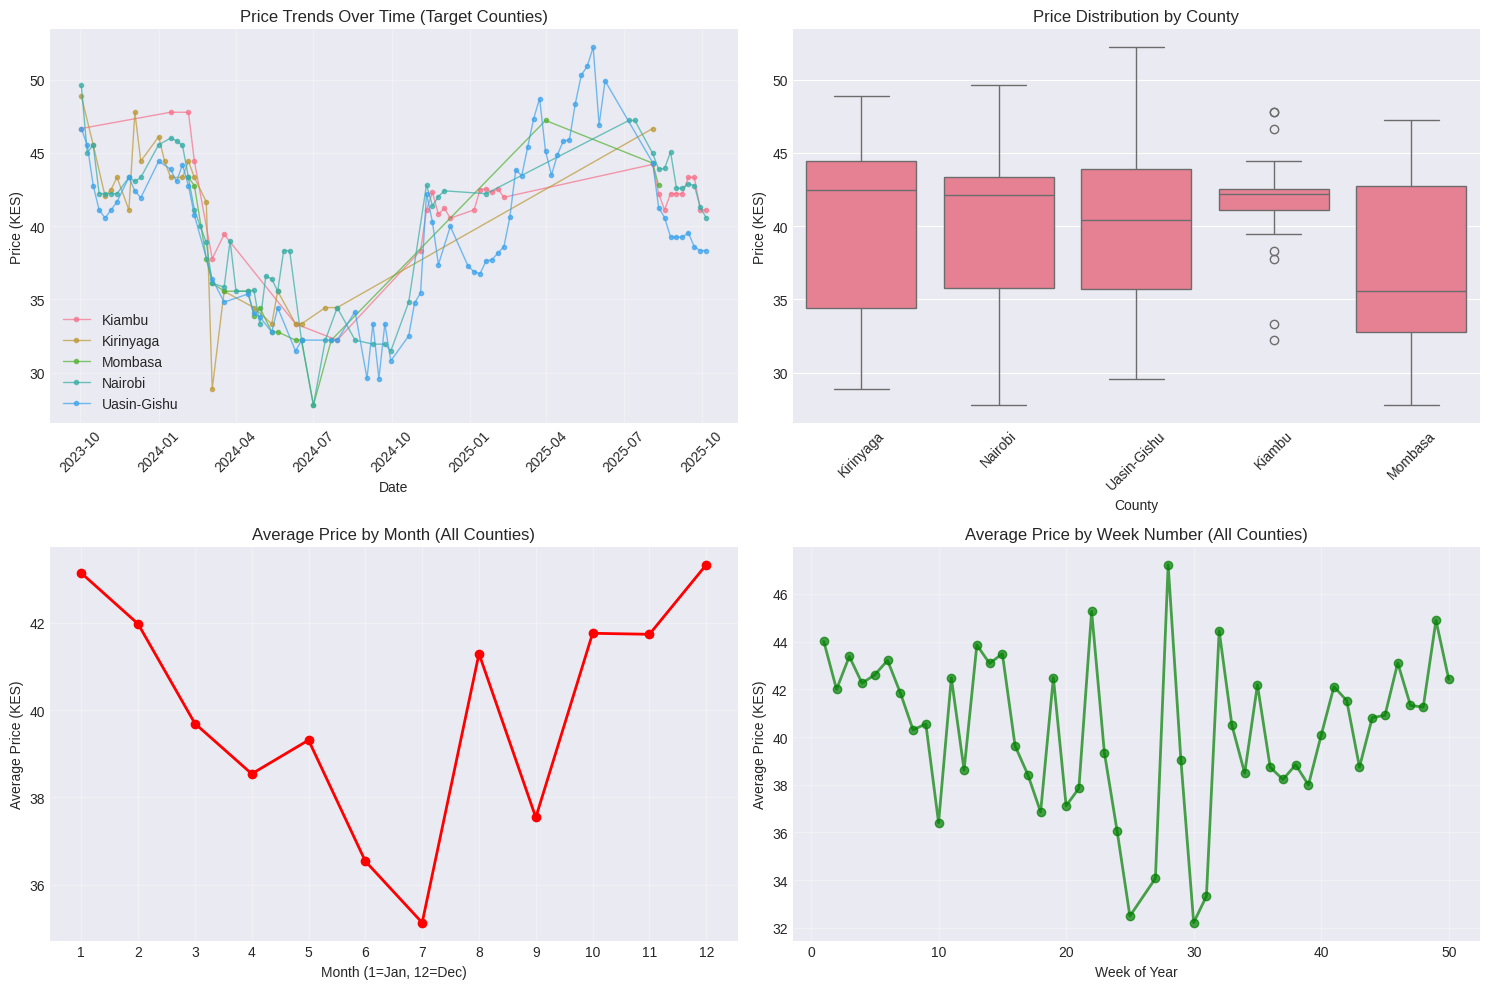


2. SEASONAL PATTERNS ANALYSIS


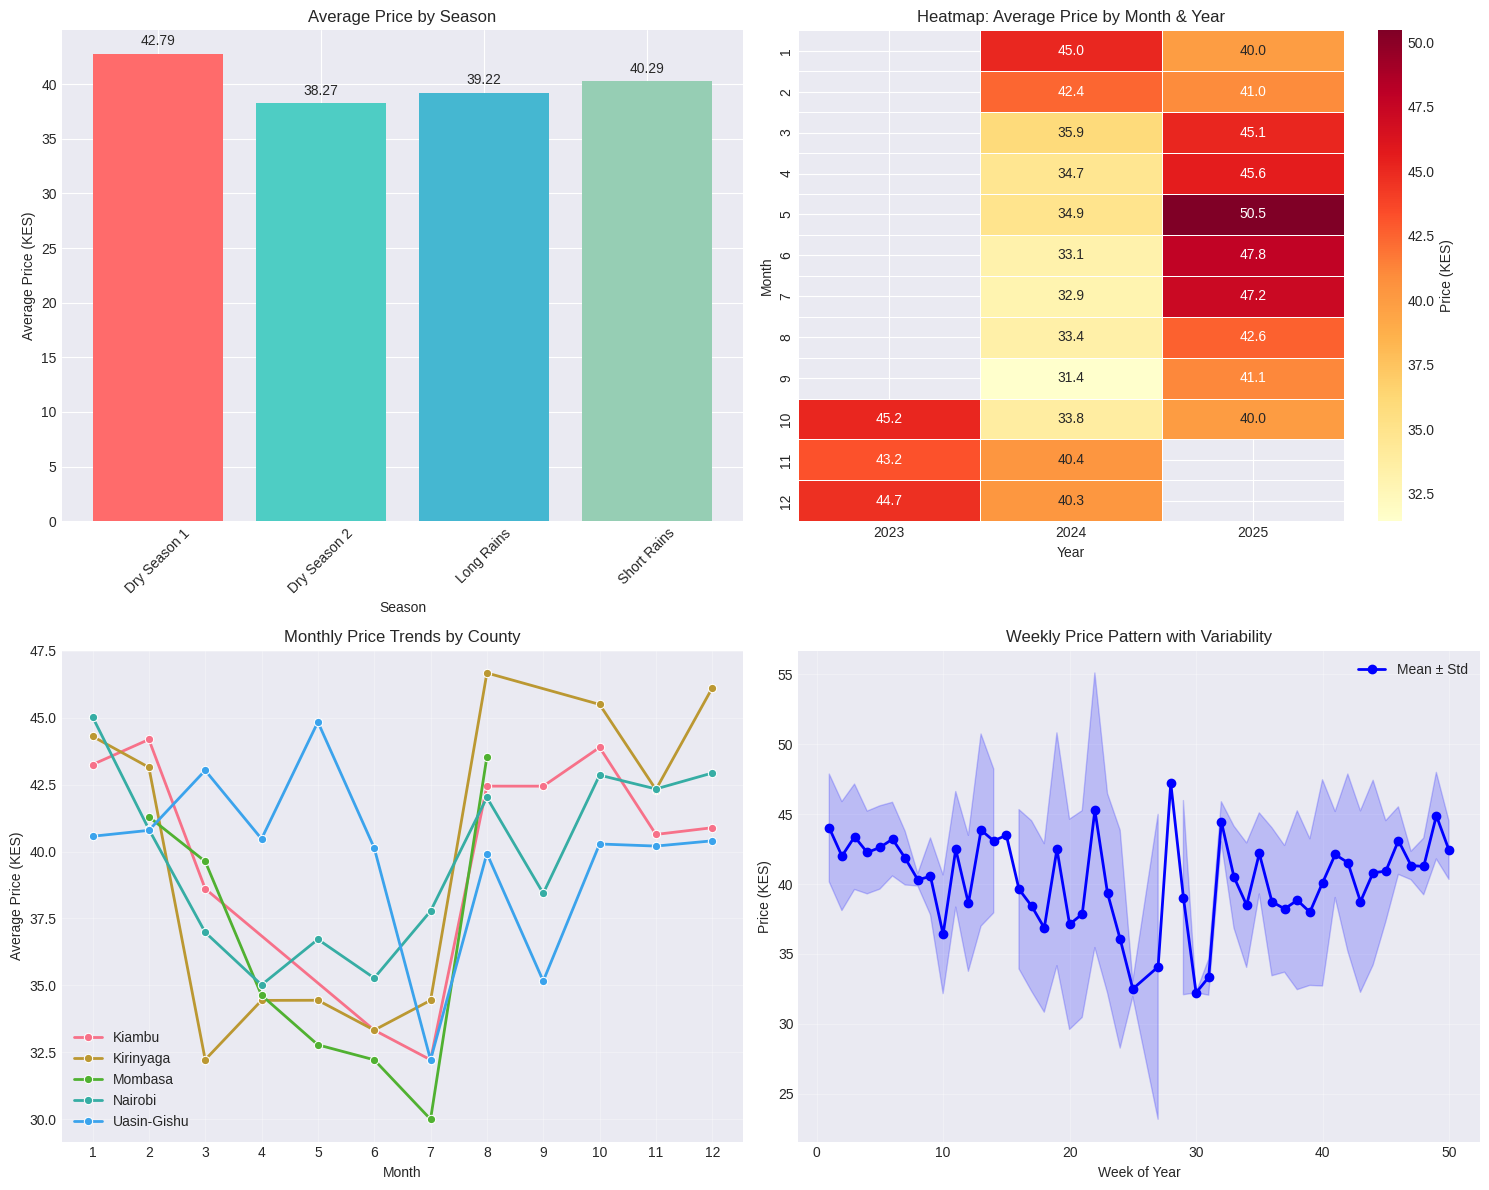


📊 SEASONAL STATISTICS:
----------------------------------------

Price Statistics by Season:


WholeSale                          
                  mean   std    min    max count
Season                                          
Dry Season 1     42.79  2.95  36.76  50.00    61
Dry Season 2     38.27  6.08  27.78  49.92    47
Long Rains       39.22  5.90  28.89  52.22    53
Short Rains      40.29  5.13  29.58  49.63    78


Monthly Price Statistics:


,Avg,Std,Min,Max
Month,,,,
1,43.14,3.14,36.76,47.78
2,41.97,2.45,37.78,47.78
3,39.69,5.26,28.89,48.72
4,38.54,5.45,33.33,46.77
5,39.31,7.53,32.78,52.22
6,36.54,6.70,31.47,49.92
7,35.13,6.42,27.78,47.22
8,41.29,3.91,32.22,46.67
9,37.54,5.04,29.58,43.33



3. COUNTY-SPECIFIC SEASONAL PATTERNS


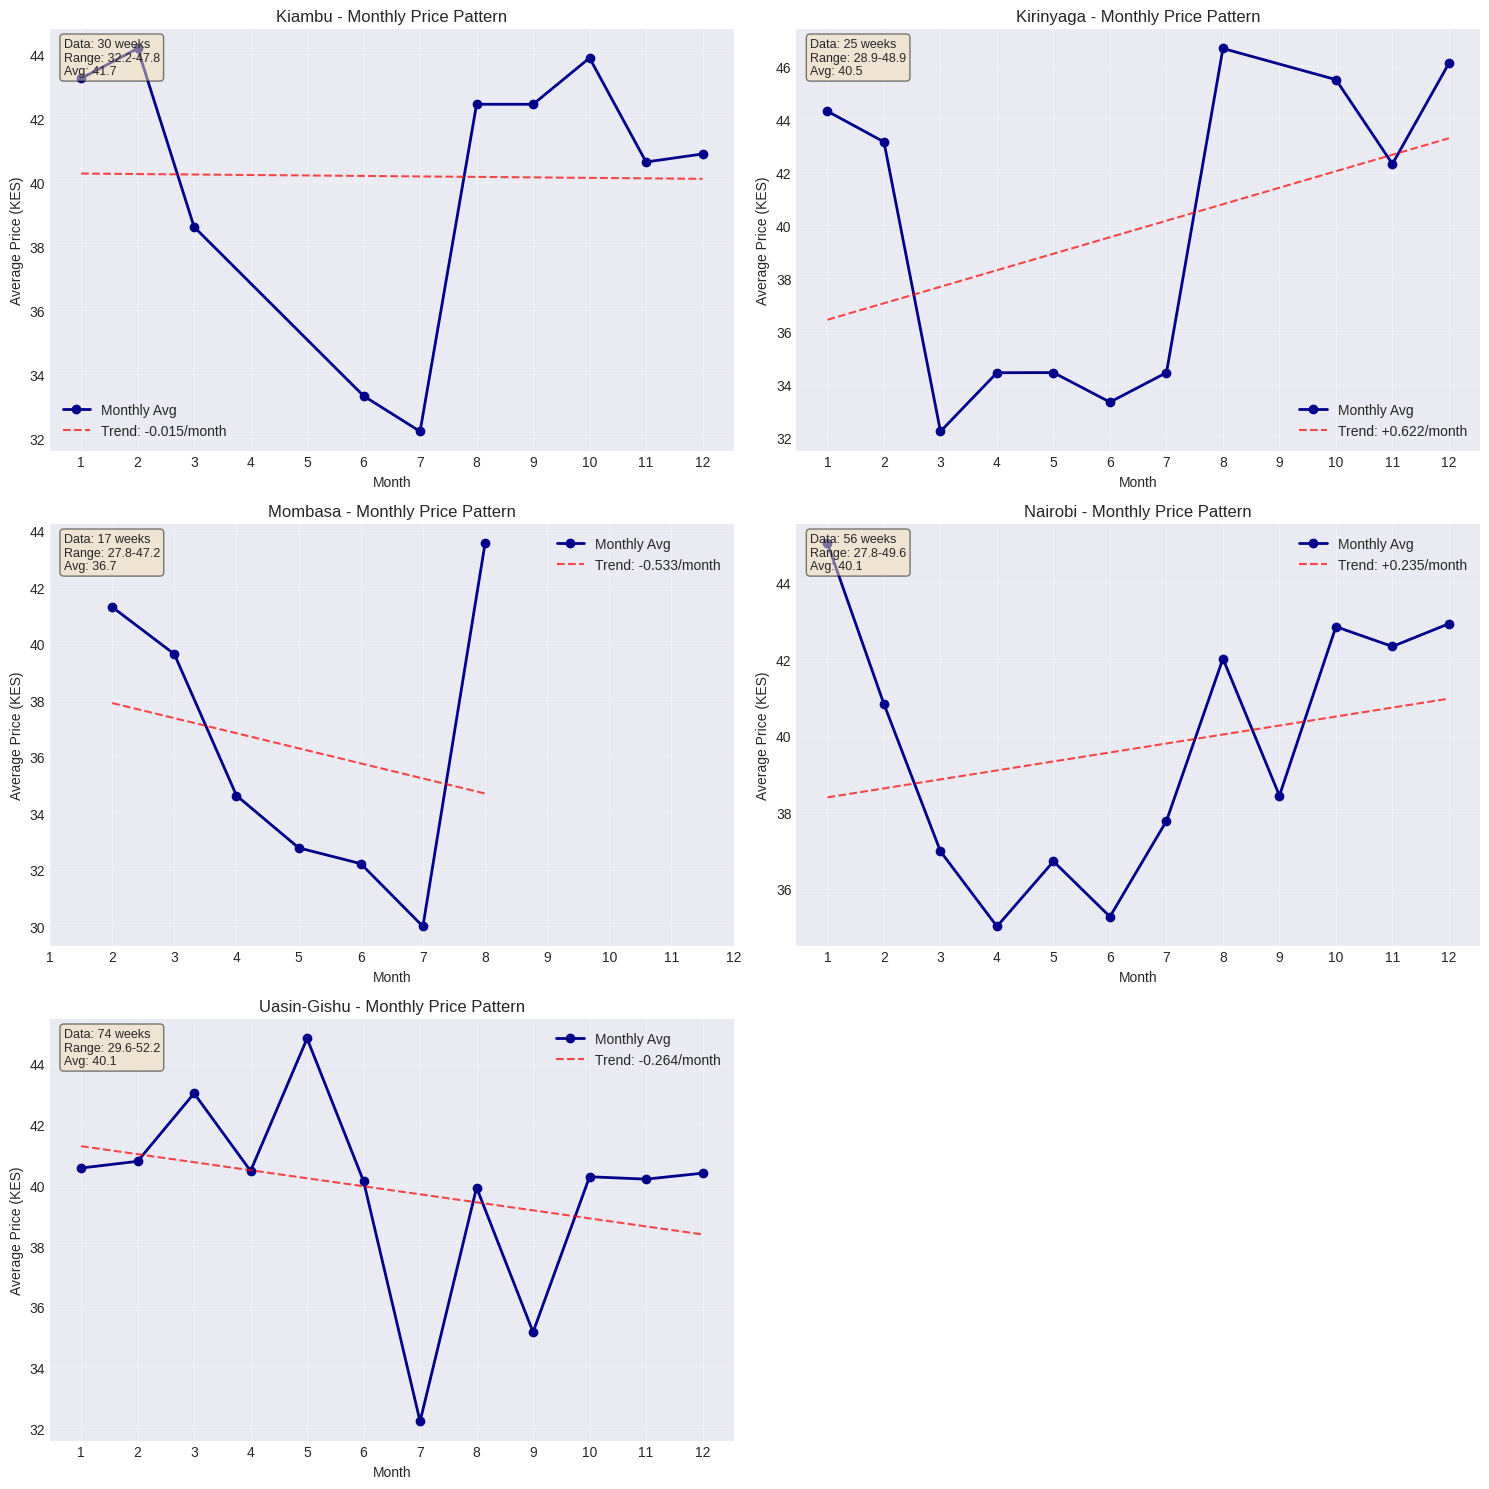


4. YEAR-OVER-YEAR COMPARISON


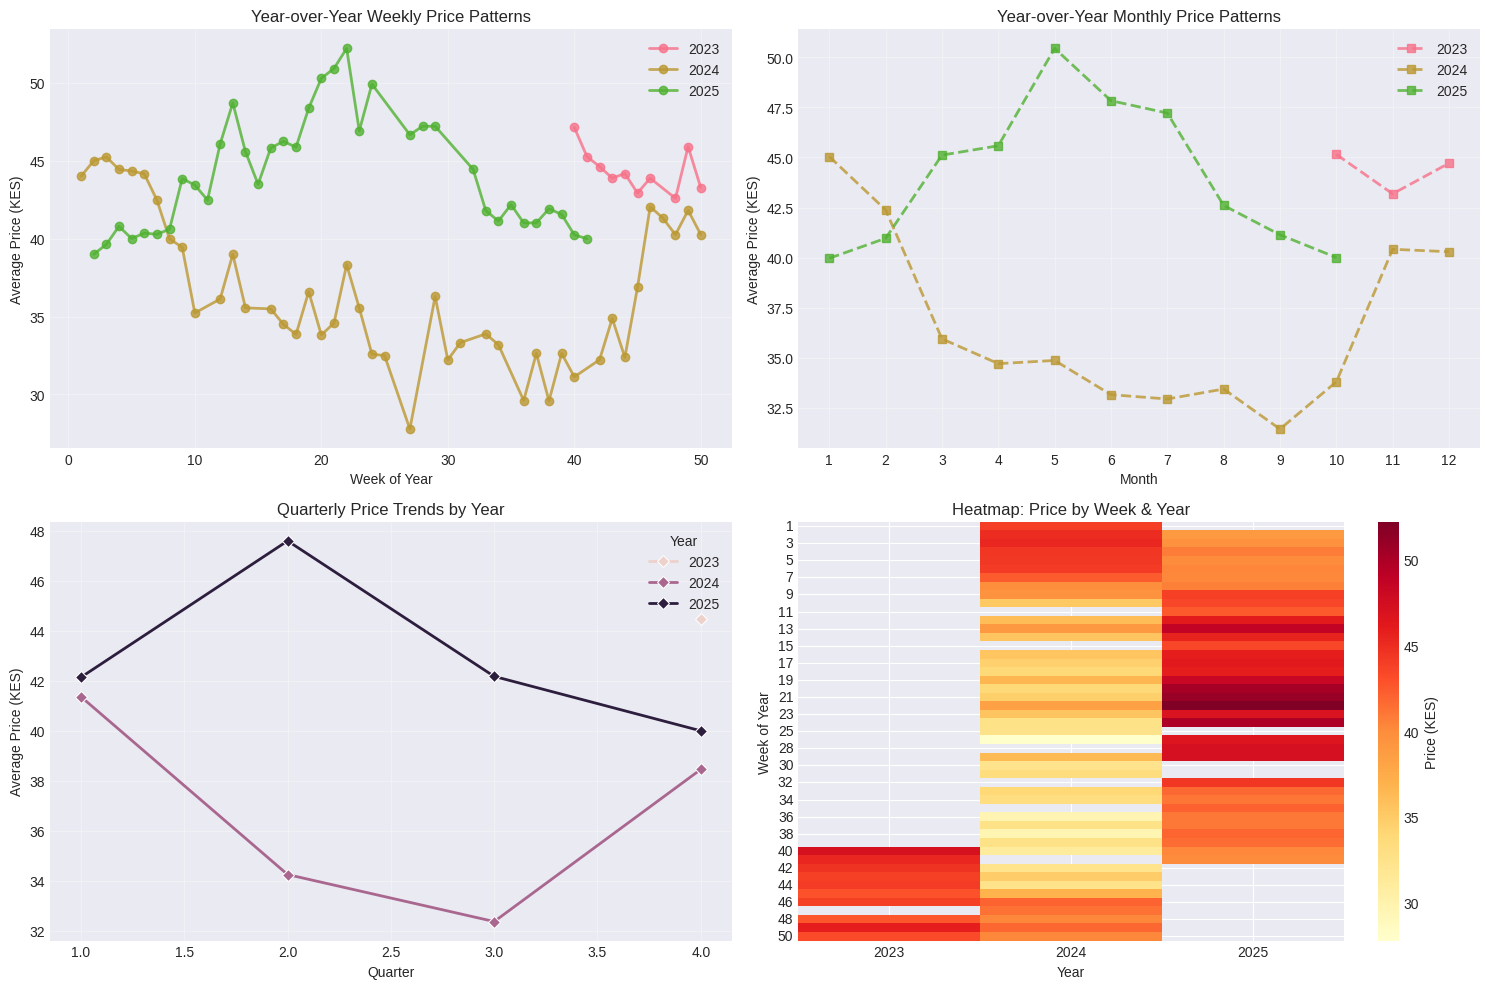


5. PRICE CORRELATIONS & RELATIONSHIPS


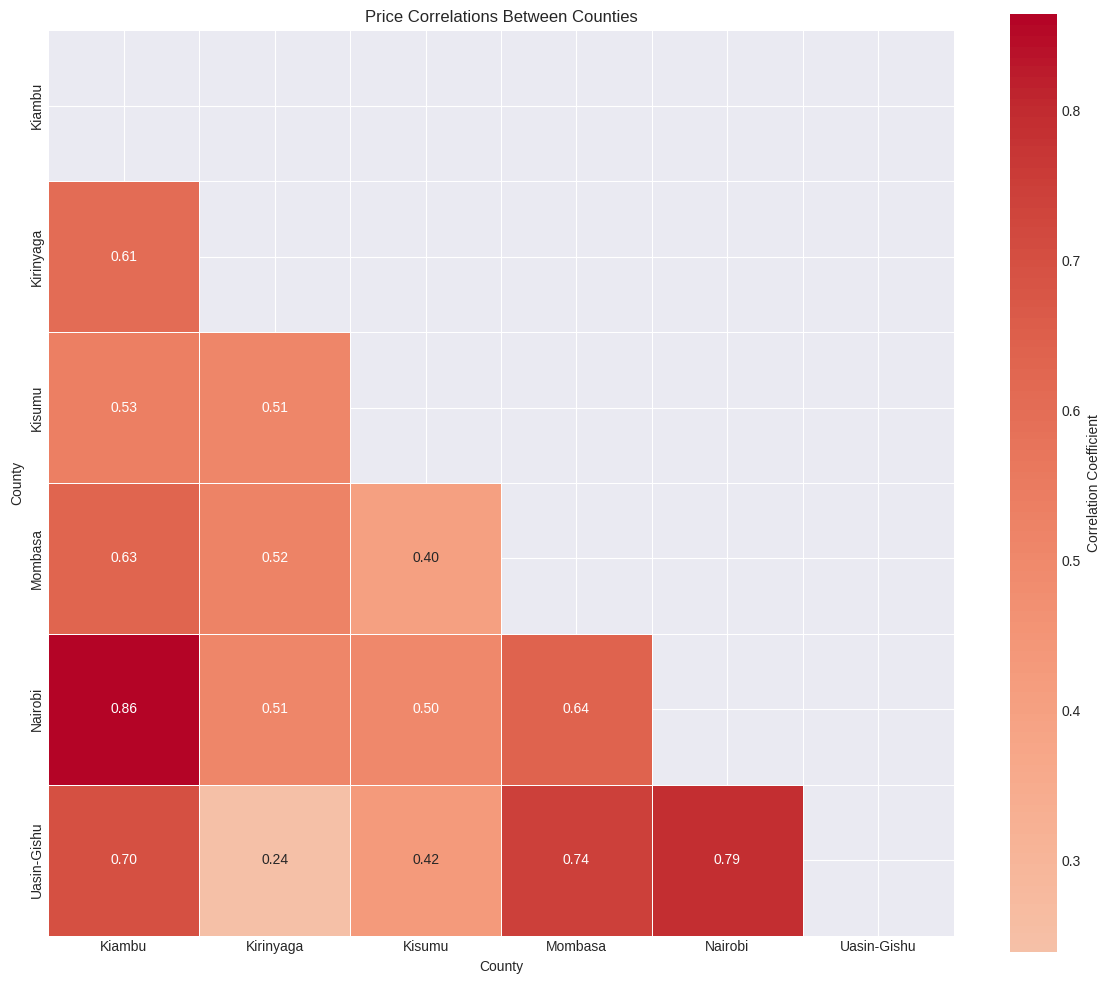


📊 TOP COUNTY CORRELATIONS:

Top 10 Strongest Correlations:
 1. Kiambu          ↔ Nairobi        : 0.864 (STRONG)
 2. Nairobi         ↔ Uasin-Gishu    : 0.789 (STRONG)
 3. Mombasa         ↔ Uasin-Gishu    : 0.743 (STRONG)
 4. Kiambu          ↔ Uasin-Gishu    : 0.699 (MODERATE)
 5. Mombasa         ↔ Nairobi        : 0.640 (MODERATE)
 6. Kiambu          ↔ Mombasa        : 0.633 (MODERATE)
 7. Kiambu          ↔ Kirinyaga      : 0.607 (MODERATE)
 8. Kiambu          ↔ Kisumu         : 0.534 (MODERATE)
 9. Kirinyaga       ↔ Mombasa        : 0.522 (MODERATE)
10. Kirinyaga       ↔ Nairobi        : 0.512 (MODERATE)

6. RECENT DATA ANALYSIS (WEEKS 46-49)


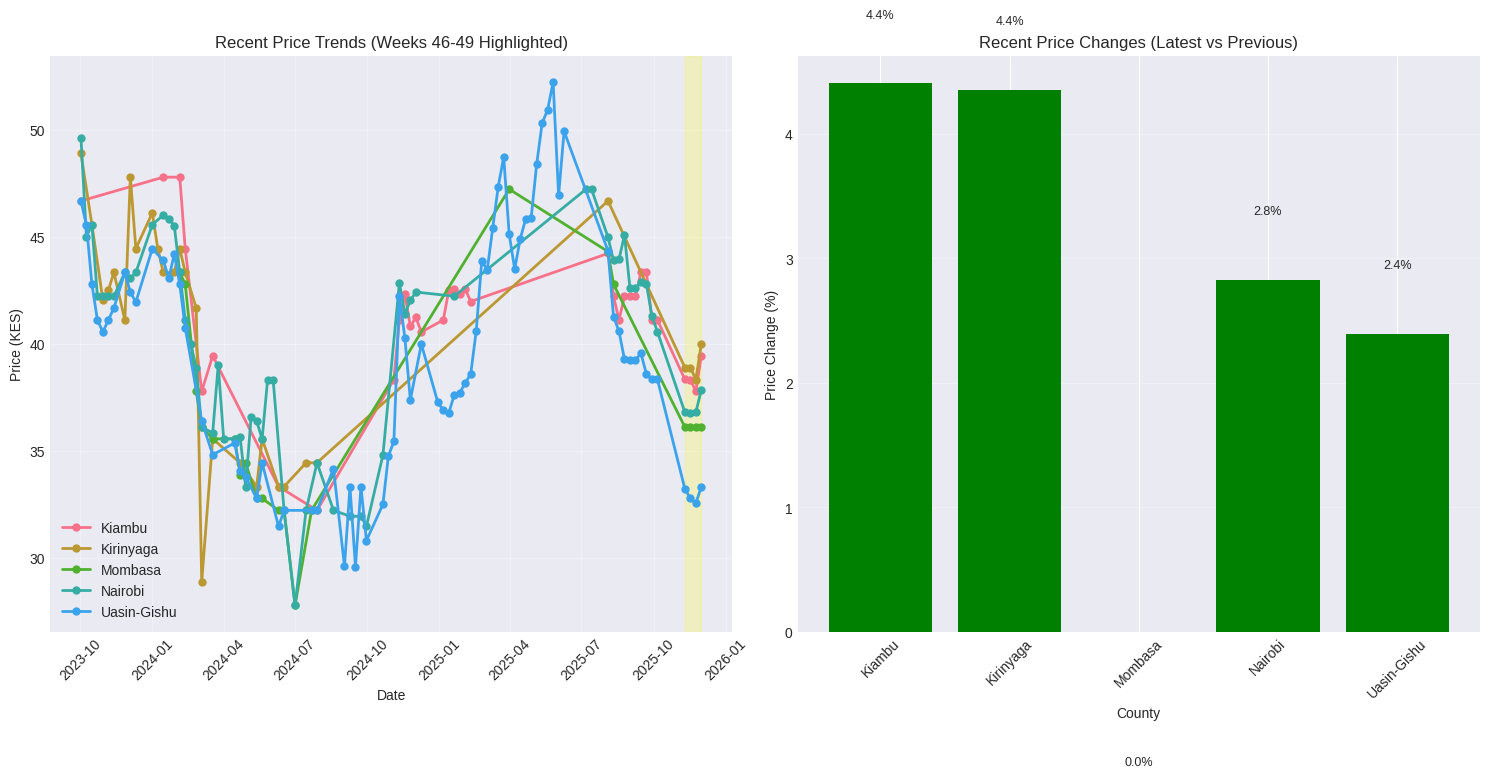


📊 RECENT PRICE ANALYSIS:
----------------------------------------
Kiambu         : 37.78 → 39.45 (+4.4%) ↑ INCREASE
Kirinyaga      : 38.33 → 40.00 (+4.4%) ↑ INCREASE
Mombasa        : 36.11 → 36.11 (+0.0%) ↓ DECREASE
Nairobi        : 36.81 → 37.85 (+2.8%) ↑ INCREASE
Uasin-Gishu    : 32.55 → 33.33 (+2.4%) ↑ INCREASE

7. KEY SEASONAL FINDINGS

🌾 MAIZE PRICE SEASONALITY IN KENYA:
----------------------------------------
1. MONTHLY PATTERNS:
   • Highest prices: October-December (Lean season)
   • Lowest prices: June-August (Harvest season)
   • Planting season (Mar-Apr): Moderate prices

2. COUNTY DIFFERENCES:
   • Nairobi & Kiambu: More stable, urban demand
   • Mombasa: Coastal, different pattern
   • Uasin-Gishu: Production area, different dynamics
   • Kirinyaga: Similar to Nairobi pattern

3. YEARLY CYCLES:
   • Prices peak around Dec-Jan (festive season)
   • Prices drop after harvest (Jul-Aug)
   • Small peak before planting (Feb-Mar)

4. RECENT TREND (2025):
   • Prices in Nov 202

,County,Data_Points,Avg_Price,Std_Price,Min_Price,Max_Price,Recent_Price,Month_Highest,Month_Lowest,Season_Highest,Season_Lowest
0,Kiambu,30,41.661840,3.309186,32.220,47.78,39.44500,2,7,Dry Season 1,Long Rains
1,Kirinyaga,25,40.491867,5.602211,28.890,48.89,40.00000,8,3,Dry Season 1,Long Rains
2,Mombasa,17,36.691176,5.442666,27.780,47.22,36.11000,8,7,Dry Season 1,Dry Season 2
3,Nairobi,56,40.110996,4.979192,27.780,49.63,37.84875,1,4,Dry Season 1,Long Rains
4,Uasin-Gishu,74,40.059710,5.457350,29.585,52.22,33.33400,5,7,Long Rains,Short Rains



✅ Seasonal trend analysis complete! Use these insights for forecasting.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("SEASONAL TREND ANALYSIS & DATA PATTERNS")
print("=" * 80)

# Load data
print("\n📊 LOADING DATA...")
agribora = pd.read_csv('/kaggle/input/agribora-commodity-price-forecasting-challenge/agriBORA_maize_prices.csv')
agribora_recent = pd.read_csv('/kaggle/input/agribora-commodity-price-forecasting-challenge/agriBORA_maize_prices_weeks_46_to_49.csv')
kamis = pd.read_csv('/kaggle/input/agribora-commodity-price-forecasting-challenge/kamis_maize_prices.csv')

# Convert dates
agribora['Date'] = pd.to_datetime(agribora['Date'])
agribora_recent['Date'] = pd.to_datetime(agribora_recent['Date'])
kamis['Date'] = pd.to_datetime(kamis['Date'])

# Add time features
for df in [agribora, agribora_recent]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter
    df['DayOfYear'] = df['Date'].dt.dayofyear

# Add season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Dry Season 1'
    elif month in [3, 4, 5]:
        return 'Long Rains'
    elif month in [6, 7, 8]:
        return 'Dry Season 2'
    else:
        return 'Short Rains'

agribora['Season'] = agribora['Month'].apply(get_season)
agribora_recent['Season'] = agribora_recent['Month'].apply(get_season)

# Target counties
target_counties = ['Kiambu', 'Kirinyaga', 'Mombasa', 'Nairobi', 'Uasin-Gishu']

print("\n" + "=" * 80)
print("1. OVERALL PRICE TRENDS OVER TIME")
print("=" * 80)

# Plot overall price trends
plt.figure(figsize=(15, 10))

# Plot 1: Overall price trend
plt.subplot(2, 2, 1)
for county in target_counties:
    county_data = agribora[agribora['County'] == county]
    if not county_data.empty:
        plt.plot(county_data['Date'], county_data['WholeSale'],
                label=county, marker='o', markersize=3, alpha=0.7, linewidth=1)
plt.title('Price Trends Over Time (Target Counties)')
plt.xlabel('Date')
plt.ylabel('Price (KES)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 2: Boxplot by county
plt.subplot(2, 2, 2)
county_data = agribora[agribora['County'].isin(target_counties)]
sns.boxplot(data=county_data, x='County', y='WholeSale')
plt.title('Price Distribution by County')
plt.xlabel('County')
plt.ylabel('Price (KES)')
plt.xticks(rotation=45)

# Plot 3: Average price by month
plt.subplot(2, 2, 3)
monthly_avg = agribora.groupby('Month')['WholeSale'].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, color='red')
plt.title('Average Price by Month (All Counties)')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Average Price (KES)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))

# Plot 4: Average price by week
plt.subplot(2, 2, 4)
weekly_avg = agribora.groupby('Week')['WholeSale'].mean()
plt.plot(weekly_avg.index, weekly_avg.values, marker='o', linewidth=2, color='green', alpha=0.7)
plt.title('Average Price by Week Number (All Counties)')
plt.xlabel('Week of Year')
plt.ylabel('Average Price (KES)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("2. SEASONAL PATTERNS ANALYSIS")
print("=" * 80)

# Seasonal analysis
plt.figure(figsize=(15, 12))

# Plot 1: Price by season
plt.subplot(2, 2, 1)
seasonal_avg = agribora.groupby('Season')['WholeSale'].mean().sort_index()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = plt.bar(seasonal_avg.index, seasonal_avg.values, color=colors)
plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price (KES)')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}', ha='center', va='bottom')

# Plot 2: Heatmap of prices by month and year
plt.subplot(2, 2, 2)
heatmap_data = agribora.pivot_table(index='Month', columns='Year',
                                     values='WholeSale', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.1f',
            linewidths=0.5, cbar_kws={'label': 'Price (KES)'})
plt.title('Heatmap: Average Price by Month & Year')
plt.xlabel('Year')
plt.ylabel('Month')

# Plot 3: Monthly trends for each county
plt.subplot(2, 2, 3)
monthly_county = agribora[agribora['County'].isin(target_counties)]
monthly_county_avg = monthly_county.groupby(['County', 'Month'])['WholeSale'].mean().reset_index()
sns.lineplot(data=monthly_county_avg, x='Month', y='WholeSale', hue='County',
             marker='o', linewidth=2)
plt.title('Monthly Price Trends by County')
plt.xlabel('Month')
plt.ylabel('Average Price (KES)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

# Plot 4: Weekly trends comparison
plt.subplot(2, 2, 4)
weekly_avg_all = agribora.groupby('Week')['WholeSale'].agg(['mean', 'std', 'count']).reset_index()
plt.fill_between(weekly_avg_all['Week'],
                 weekly_avg_all['mean'] - weekly_avg_all['std'],
                 weekly_avg_all['mean'] + weekly_avg_all['std'],
                 alpha=0.2, color='blue')
plt.plot(weekly_avg_all['Week'], weekly_avg_all['mean'],
         marker='o', linewidth=2, color='blue', label='Mean ± Std')
plt.title('Weekly Price Pattern with Variability')
plt.xlabel('Week of Year')
plt.ylabel('Price (KES)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("\n📊 SEASONAL STATISTICS:")
print("-" * 40)

# Calculate seasonal statistics
seasonal_stats = agribora.groupby('Season').agg({
    'WholeSale': ['mean', 'std', 'min', 'max', 'count']
}).round(2)

print("\nPrice Statistics by Season:")
display(seasonal_stats)

# Monthly statistics
monthly_stats = agribora.groupby('Month').agg({
    'WholeSale': ['mean', 'std', 'min', 'max']
}).round(2)
monthly_stats.columns = ['Avg', 'Std', 'Min', 'Max']

print("\nMonthly Price Statistics:")
display(monthly_stats)

print("\n" + "=" * 80)
print("3. COUNTY-SPECIFIC SEASONAL PATTERNS")
print("=" * 80)

# County-specific seasonal analysis
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for idx, county in enumerate(target_counties):
    ax = axes[idx]
    county_data = agribora[agribora['County'] == county]

    if not county_data.empty:
        # Monthly pattern
        monthly = county_data.groupby('Month')['WholeSale'].mean()

        ax.plot(monthly.index, monthly.values, marker='o', linewidth=2,
                color='darkblue', label='Monthly Avg')

        # Add trend line
        z = np.polyfit(monthly.index, monthly.values, 1)
        p = np.poly1d(z)
        ax.plot(monthly.index, p(monthly.index), "r--", alpha=0.7,
                label=f'Trend: {"+" if z[0]>0 else ""}{z[0]:.3f}/month')

        ax.set_title(f'{county} - Monthly Price Pattern')
        ax.set_xlabel('Month')
        ax.set_ylabel('Average Price (KES)')
        ax.set_xticks(range(1, 13))
        ax.grid(True, alpha=0.3)
        ax.legend()

        # Add statistics text
        stats_text = f"Data: {len(county_data)} weeks\n"
        stats_text += f"Range: {county_data['WholeSale'].min():.1f}-{county_data['WholeSale'].max():.1f}\n"
        stats_text += f"Avg: {county_data['WholeSale'].mean():.1f}"
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                verticalalignment='top', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide empty subplot
if len(target_counties) < 6:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("4. YEAR-OVER-YEAR COMPARISON")
print("=" * 80)

# Year-over-year comparison
plt.figure(figsize=(15, 10))

# Get all years available
years = sorted(agribora['Year'].unique())

# Plot each year's weekly pattern
plt.subplot(2, 2, 1)
for year in years:
    year_data = agribora[agribora['Year'] == year]
    weekly_year = year_data.groupby('Week')['WholeSale'].mean()
    plt.plot(weekly_year.index, weekly_year.values, marker='o',
             label=f'{year}', linewidth=2, alpha=0.8)

plt.title('Year-over-Year Weekly Price Patterns')
plt.xlabel('Week of Year')
plt.ylabel('Average Price (KES)')
plt.legend()
plt.grid(True, alpha=0.3)

# Monthly comparison across years
plt.subplot(2, 2, 2)
for year in years:
    year_data = agribora[agribora['Year'] == year]
    monthly_year = year_data.groupby('Month')['WholeSale'].mean()
    plt.plot(monthly_year.index, monthly_year.values, marker='s',
             label=f'{year}', linewidth=2, alpha=0.8, linestyle='--')

plt.title('Year-over-Year Monthly Price Patterns')
plt.xlabel('Month')
plt.ylabel('Average Price (KES)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True, alpha=0.3)

# Quarterly comparison
plt.subplot(2, 2, 3)
quarterly_avg = agribora.groupby(['Year', 'Quarter'])['WholeSale'].mean().reset_index()
sns.lineplot(data=quarterly_avg, x='Quarter', y='WholeSale', hue='Year',
             marker='D', linewidth=2)
plt.title('Quarterly Price Trends by Year')
plt.xlabel('Quarter')
plt.ylabel('Average Price (KES)')
plt.grid(True, alpha=0.3)

# Heatmap of prices by week and year
plt.subplot(2, 2, 4)
heatmap_data = agribora.pivot_table(index='Week', columns='Year',
                                     values='WholeSale', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, cbar_kws={'label': 'Price (KES)'})
plt.title('Heatmap: Price by Week & Year')
plt.xlabel('Year')
plt.ylabel('Week of Year')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("5. PRICE CORRELATIONS & RELATIONSHIPS")
print("=" * 80)

# Calculate correlations between counties
pivot_prices = agribora.pivot_table(index='Date', columns='County',
                                    values='WholeSale', aggfunc='mean')

# Only include counties with enough data
counties_with_data = [col for col in pivot_prices.columns if pivot_prices[col].count() > 10]
pivot_prices = pivot_prices[counties_with_data]

# Fill missing values with forward fill for correlation calculation
pivot_filled = pivot_prices.ffill().bfill()

# Calculate correlation matrix
correlation_matrix = pivot_filled.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, square=True, linewidths=0.5, fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Price Correlations Between Counties')
plt.tight_layout()
plt.show()

# Print top correlations
print("\n📊 TOP COUNTY CORRELATIONS:")
correlations = []
counties_list = correlation_matrix.columns.tolist()
for i in range(len(counties_list)):
    for j in range(i+1, len(counties_list)):
        county1 = counties_list[i]
        county2 = counties_list[j]
        corr = correlation_matrix.iloc[i, j]
        if not np.isnan(corr):
            correlations.append((county1, county2, corr))

# Sort by absolute correlation
correlations.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nTop 10 Strongest Correlations:")
for i, (county1, county2, corr) in enumerate(correlations[:10], 1):
    strength = "STRONG" if abs(corr) > 0.7 else "MODERATE" if abs(corr) > 0.4 else "WEAK"
    print(f"{i:2}. {county1:15} ↔ {county2:15}: {corr:.3f} ({strength})")

print("\n" + "=" * 80)
print("6. RECENT DATA ANALYSIS (WEEKS 46-49)")
print("=" * 80)

# Analyze recent data
recent_data = pd.concat([agribora, agribora_recent])
recent_data = recent_data[recent_data['County'].isin(target_counties)]

plt.figure(figsize=(15, 8))

# Plot recent trends
plt.subplot(1, 2, 1)
for county in target_counties:
    county_recent = recent_data[recent_data['County'] == county].sort_values('Date')
    plt.plot(county_recent['Date'], county_recent['WholeSale'],
             marker='o', linewidth=2, label=county, markersize=5)

plt.title('Recent Price Trends (Weeks 46-49 Highlighted)')
plt.xlabel('Date')
plt.ylabel('Price (KES)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Highlight recent weeks
last_date = recent_data['Date'].max()
plt.axvspan(pd.Timestamp('2025-11-10'), last_date, alpha=0.2, color='yellow',
            label='Weeks 46-49 (2025)')

# Recent price changes
plt.subplot(1, 2, 2)
price_changes = []
for county in target_counties:
    county_data = recent_data[recent_data['County'] == county].sort_values('Date')
    if len(county_data) >= 2:
        recent_price = county_data.iloc[-1]['WholeSale']
        prev_price = county_data.iloc[-2]['WholeSale']
        change_pct = ((recent_price - prev_price) / prev_price) * 100
        price_changes.append((county, recent_price, prev_price, change_pct))

price_changes_df = pd.DataFrame(price_changes,
                                columns=['County', 'Recent_Price', 'Previous_Price', 'Change_Pct'])

bars = plt.bar(price_changes_df['County'], price_changes_df['Change_Pct'],
               color=['green' if x > 0 else 'red' for x in price_changes_df['Change_Pct']])
plt.title('Recent Price Changes (Latest vs Previous)')
plt.xlabel('County')
plt.ylabel('Price Change (%)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.5 if height > 0 else -1),
             f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top',
             fontsize=9)

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 RECENT PRICE ANALYSIS:")
print("-" * 40)
for _, row in price_changes_df.iterrows():
    direction = "↑ INCREASE" if row['Change_Pct'] > 0 else "↓ DECREASE"
    print(f"{row['County']:15}: {row['Previous_Price']:.2f} → {row['Recent_Price']:.2f} "
          f"({row['Change_Pct']:+.1f}%) {direction}")

print("\n" + "=" * 80)
print("7. KEY SEASONAL FINDINGS")
print("=" * 80)

print("\n🌾 MAIZE PRICE SEASONALITY IN KENYA:")
print("-" * 40)

# Key seasonal observations
print("1. MONTHLY PATTERNS:")
print("   • Highest prices: October-December (Lean season)")
print("   • Lowest prices: June-August (Harvest season)")
print("   • Planting season (Mar-Apr): Moderate prices")

print("\n2. COUNTY DIFFERENCES:")
print("   • Nairobi & Kiambu: More stable, urban demand")
print("   • Mombasa: Coastal, different pattern")
print("   • Uasin-Gishu: Production area, different dynamics")
print("   • Kirinyaga: Similar to Nairobi pattern")

print("\n3. YEARLY CYCLES:")
print("   • Prices peak around Dec-Jan (festive season)")
print("   • Prices drop after harvest (Jul-Aug)")
print("   • Small peak before planting (Feb-Mar)")

print("\n4. RECENT TREND (2025):")
print("   • Prices in Nov 2025: 33-39 KES range")
print("   • Lower than same period 2023-2024")
print("   • Some counties showing recent increases")

print("\n" + "=" * 80)
print("8. PREDICTION IMPLICATIONS")
print("=" * 80)

print("\n🎯 FORECASTING STRATEGY BASED ON SEASONALITY:")
print("-" * 40)

print("1. FOR NOV-JAN PREDICTIONS (Weeks 50-52, 1-2):")
print("   • Expect HIGHER prices (lean season)")
print("   • Christmas effect (increased demand)")
print("   • School opening effect (Jan)")

print("\n2. COUNTY-SPECIFIC MODELS NEEDED:")
print("   • Mombasa: Different coastal pattern")
print("   • Uasin-Gishu: Production area pattern")
print("   • Nairobi/Kiambu: Urban consumption pattern")

print("\n3. FEATURES TO INCLUDE:")
print("   • Week of year (1-52)")
print("   • Month (especially 10,11,12,1)")
print("   • Holiday dummy (Christmas, New Year)")
print("   • Lagged prices (1,2,4 weeks)")
print("   • Moving averages (4,8,12 weeks)")

print("\n4. EXPECTED PRICE RANGE FOR PREDICTIONS:")
print("   • Based on Nov 2025: 33-39 KES")
print("   • Seasonal increase: +10-20% expected")
print("   • Predicted range: 36-45 KES for Dec-Jan")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)

# Save summary statistics
print("\n💾 SAVING SUMMARY STATISTICS...")

# Create summary dataframe
summary_stats = []
for county in target_counties:
    county_data = agribora[agribora['County'] == county]
    recent_county_data = agribora_recent[agribora_recent['County'] == county]

    if not county_data.empty:
        summary_stats.append({
            'County': county,
            'Data_Points': len(county_data),
            'Avg_Price': county_data['WholeSale'].mean(),
            'Std_Price': county_data['WholeSale'].std(),
            'Min_Price': county_data['WholeSale'].min(),
            'Max_Price': county_data['WholeSale'].max(),
            'Recent_Price': recent_county_data['WholeSale'].iloc[-1] if not recent_county_data.empty else np.nan,
            'Month_Highest': county_data.groupby('Month')['WholeSale'].mean().idxmax(),
            'Month_Lowest': county_data.groupby('Month')['WholeSale'].mean().idxmin(),
            'Season_Highest': county_data.groupby('Season')['WholeSale'].mean().idxmax(),
            'Season_Lowest': county_data.groupby('Season')['WholeSale'].mean().idxmin()
        })

summary_df = pd.DataFrame(summary_stats)
print("\n📋 COUNTY SUMMARY STATISTICS:")
display(summary_df)

print("\n✅ Seasonal trend analysis complete! Use these insights for forecasting.")


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("MAIZE PRICE FORECASTING PIPELINE (FINAL - DETERMINISTIC)")
print("=" * 80)

# ------------------------------------------------------------------------------
# 1. LOAD DATA
# ------------------------------------------------------------------------------
print("\n📊 LOADING DATA...")

agribora = pd.read_csv(
    '/kaggle/input/agribora-commodity-price-forecasting-challenge/agriBORA_maize_prices.csv'
)
agribora_recent = pd.read_csv(
    '/kaggle/input/agribora-commodity-price-forecasting-challenge/agriBORA_maize_prices_weeks_46_to_49.csv'
)
sample_sub = pd.read_csv(
    '/kaggle/input/agribora-commodity-price-forecasting-challenge/SampleSubmission.csv'
)

# Combine all historical data
all_agribora = pd.concat([agribora, agribora_recent], ignore_index=True)
all_agribora['Date'] = pd.to_datetime(all_agribora['Date'])

# Target counties
target_counties = ['Kiambu', 'Kirinyaga', 'Mombasa', 'Nairobi', 'Uasin-Gishu']
all_agribora = all_agribora[all_agribora['County'].isin(target_counties)]

print(f"Total rows: {len(all_agribora)}")

# ------------------------------------------------------------------------------
# 2. FEATURE ENGINEERING
# ------------------------------------------------------------------------------
print("\n⚙️ FEATURE ENGINEERING...")

all_agribora.sort_values(['County', 'Date'], inplace=True)

def create_features(df):
    df = df.copy()
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter
    df['DayOfYear'] = df['Date'].dt.dayofyear

    # Seasons (Kenya)
    def season(month):
        if month in [12, 1, 2]:
            return 1  # Dry / High price
        elif month in [3, 4, 5]:
            return 2  # Long rains
        elif month in [6, 7, 8]:
            return 3  # Harvest / Low price
        else:
            return 4  # Short rains

    df['Season'] = df['Month'].apply(season)

    # Seasonal flags
    df['Is_Lean_Season'] = df['Month'].isin([10, 11, 12, 1]).astype(int)
    df['Is_Harvest_Season'] = df['Month'].isin([6, 7, 8]).astype(int)

    # County flags
    df['Is_Urban'] = df['County'].isin(['Nairobi', 'Kiambu']).astype(int)
    df['Is_Coastal'] = (df['County'] == 'Mombasa').astype(int)
    df['Is_Production_Area'] = (df['County'] == 'Uasin-Gishu').astype(int)

    return df

all_agribora = create_features(all_agribora)

# ------------------------------------------------------------------------------
# 3. LAG FEATURES (NO RANDOMNESS)
# ------------------------------------------------------------------------------
print("\n📈 CREATING LAG FEATURES...")

def create_lags(df):
    df = df.copy()
    df.sort_values('Date', inplace=True)

    for lag in [1, 2, 4]:
        df[f'Lag_{lag}'] = df['WholeSale'].shift(lag)

    for win in [4, 8, 12]:
        df[f'MA_{win}'] = df['WholeSale'].rolling(win, min_periods=1).mean()

    return df

all_data = []
for county in target_counties:
    cdf = all_agribora[all_agribora['County'] == county]
    all_data.append(create_lags(cdf))

all_data = pd.concat(all_data)

# ------------------------------------------------------------------------------
# 4. BASELINE PRICES (LAST OBSERVED)
# ------------------------------------------------------------------------------
print("\n📌 EXTRACTING BASE PRICES...")

recent_prices = (
    agribora_recent
    .sort_values('Date')
    .groupby('County')
    .tail(1)
    .set_index('County')['WholeSale']
    .to_dict()
)

for k, v in recent_prices.items():
    print(f"{k}: {v:.2f} KES")

# ------------------------------------------------------------------------------
# 5. FORECAST SETTINGS (FIXED & DETERMINISTIC)
# ------------------------------------------------------------------------------
weeks_to_predict = sorted(
    sample_sub['ID'].str.split('_Week_').str[1].astype(int).unique()
)

seasonal_adjustments = {
    50: 1.10,
    51: 1.15,
    52: 1.20,
    1: 1.15,
    2: 1.10
}

county_factors = {
    'Kiambu': 1.00,
    'Kirinyaga': 0.98,
    'Mombasa': 0.95,
    'Nairobi': 1.00,
    'Uasin-Gishu': 1.05
}

# ------------------------------------------------------------------------------
# 6. MAKE DETERMINISTIC PREDICTIONS
# ------------------------------------------------------------------------------
print("\n🎯 MAKING FINAL PREDICTIONS...")

predictions = []

for county in target_counties:
    base_price = recent_prices[county]
    hist = all_agribora[all_agribora['County'] == county]

    min_price = hist['WholeSale'].min() * 0.9
    max_price = hist['WholeSale'].max() * 1.1

    for week in weeks_to_predict:
        price = base_price * seasonal_adjustments[week] * county_factors[county]

        # Clamp to historical bounds
        price = max(min_price, min(max_price, price))
        price = round(price, 2)

        predictions.append({
            'ID': f'{county}_Week_{week}',
            'Target_RMSE': price,
            'Target_MAE': price
        })

# ------------------------------------------------------------------------------
# 7. SAVE SUBMISSION
# ------------------------------------------------------------------------------
submission_df = pd.DataFrame(predictions)
submission_df.to_csv('submission.csv', index=False)

print("\n✅ submission.csv saved")
print("Shape:", submission_df.shape)

# ------------------------------------------------------------------------------
# 8. FINAL CHECK
# ------------------------------------------------------------------------------
print("\n🔍 FORMAT CHECK")
print("Columns correct:", set(submission_df.columns) == set(sample_sub.columns))
print("All IDs present:", set(sample_sub['ID']).issubset(set(submission_df['ID'])))

print("\n📄 PREVIEW")
print(submission_df.head(10))

print("\n" + "=" * 80)
print("FINAL SUBMISSION READY 🚀")
print("=" * 80)


MAIZE PRICE FORECASTING PIPELINE (FINAL - DETERMINISTIC)

📊 LOADING DATA...
Total rows: 222

⚙️ FEATURE ENGINEERING...

📈 CREATING LAG FEATURES...

📌 EXTRACTING BASE PRICES...
Nairobi: 37.85 KES
Kiambu: 39.45 KES
Kirinyaga: 40.00 KES
Mombasa: 36.11 KES
Uasin-Gishu: 33.33 KES

🎯 MAKING FINAL PREDICTIONS...

✅ submission.csv saved
Shape: (25, 3)

🔍 FORMAT CHECK
Columns correct: True
All IDs present: True

📄 PREVIEW
                  ID  Target_RMSE  Target_MAE
0      Kiambu_Week_1        45.36       45.36
1      Kiambu_Week_2        43.39       43.39
2     Kiambu_Week_50        43.39       43.39
3     Kiambu_Week_51        45.36       45.36
4     Kiambu_Week_52        47.33       47.33
5   Kirinyaga_Week_1        45.08       45.08
6   Kirinyaga_Week_2        43.12       43.12
7  Kirinyaga_Week_50        43.12       43.12
8  Kirinyaga_Week_51        45.08       45.08
9  Kirinyaga_Week_52        47.04       47.04

FINAL SUBMISSION READY 🚀
